In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import math as mt
import pylab
import os

In [2]:
raw_data = pd.read_csv('/Users/roya/Downloads/Financial Dataset - 1.csv')
raw_data

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed


Getting Information

In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [4]:
raw_data.shape

(23524, 13)

In [5]:
raw_data.isna().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [6]:
raw_data.describe()

,year,household_size,Respondent Age
count,23524.000000,23496.000000,23490.000000
mean,2016.979000,3.681818,38.804300
std,0.899669,2.279933,16.519996
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


In [7]:
raw_data.duplicated().sum()

0

In [8]:
raw_data.nunique().to_frame('number of unique values')

,number of unique values
country,4
year,6
uniqueid,8735
Has a Bank account,2
Type of Location,2
Cell Phone Access,2
household_size,21
Respondent Age,85
gender_of_respondent,2
The relathip with head,6


In [10]:
#percent of missing 
percent_missing = raw_data.isnull().sum() * 100 / len(raw_data) 
print(percent_missing)

country                   0.059514
year                      0.000000
uniqueid                  0.000000
Has a Bank account        0.153035
Type of Location          0.063765
Cell Phone Access         0.046761
household_size            0.119027
Respondent Age            0.144533
gender_of_respondent      0.144533
The relathip with head    0.017004
marital_status            0.136031
Level of Educuation       0.123278
Type of Job               0.127529
dtype: float64


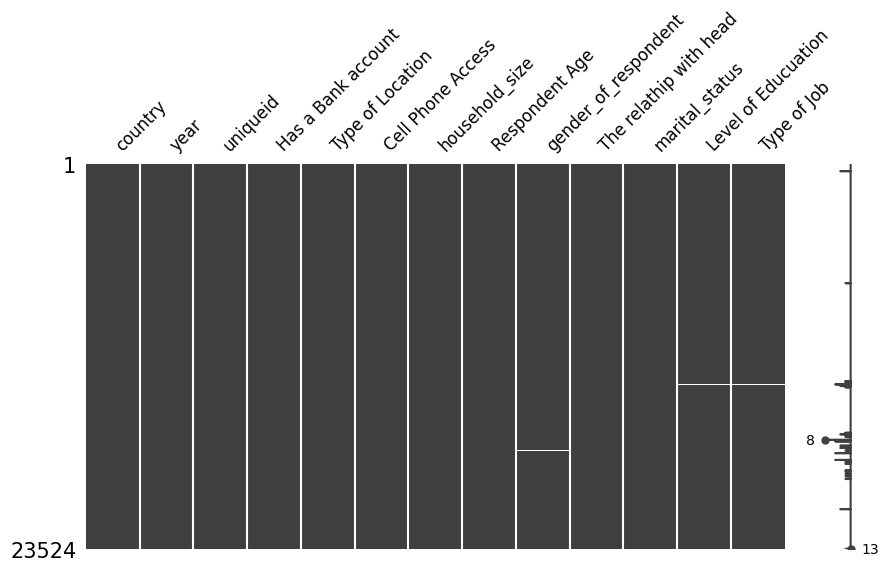

In [11]:
import missingno
missingno.matrix(raw_data, figsize=(10,5), fontsize=12);

In [13]:
#dropping the missing values
cleaned_data = raw_data.dropna()
cleaned_data.isnull().sum()

country                   0
year                      0
uniqueid                  0
Has a Bank account        0
Type of Location          0
Cell Phone Access         0
household_size            0
Respondent Age            0
gender_of_respondent      0
The relathip with head    0
marital_status            0
Level of Educuation       0
Type of Job               0
dtype: int64

In [14]:
cleaned_data

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [15]:
cleaned_data = pd.DataFrame(cleaned_data.drop(columns = ['uniqueid']))
cleaned_data

,country,year,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed


 Exploratory Analysis

In [16]:
#setting colors for our plots
colors = ['#7FB3D5', '#73C6B6', '#F0B27A', '#C39BD3', '#ABEBC6', '#F4D03F']
#setting the font, figsize and font size globally
plt.rcParams.update({'font.family':'Times New Roman'})
plt.rcParams.update({'font.size':13})
plt.rcParams['figure.figsize'] = [10, 5]

Univariate analysis

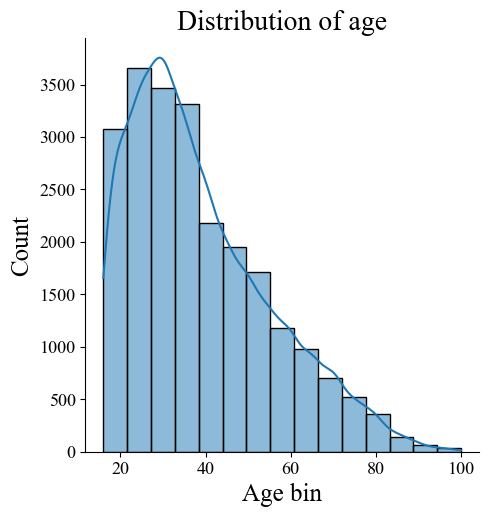

In [17]:
# Analysing the numeric variables
numeric = cleaned_data[['household_size', 'Respondent Age']]

# Analysing our respondents age
sb.displot(numeric['Respondent Age'], bins = 15,kde = True)
plt.title('Distribution of age', fontsize = 20)
plt.ylabel('Count', fontsize = 18)
plt.xlabel('Age bin', fontsize = 18)
plt.show()

In [18]:
# The descriptive statistics of the data
pd.DataFrame(numeric['Respondent Age']).describe()

,Respondent Age
count,23343.000000
mean,38.805509
std,16.519803
min,16.000000
25%,26.000000
50%,35.000000
75%,49.000000
max,100.000000


From the table the minimum age of the respondent is sixteen years while the maximum age of the age is 100 years. The average age of the respondent is 38 years.

Text(0.5, 13.944444444444445, 'Household size bin')

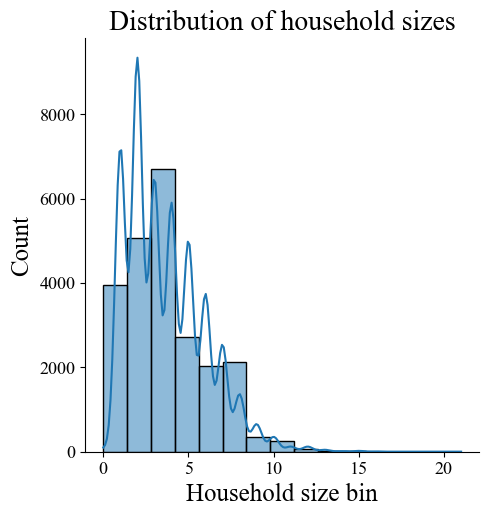

In [19]:
# Analysing the household size

sb.displot(numeric['household_size'], bins = 15, kde = True)
plt.title('Distribution of household sizes', fontsize = 20)
plt.ylabel('Count', fontsize = 18)
plt.xlabel('Household size bin', fontsize = 18)

In [20]:
# The descriptive statistics of the data
pd.DataFrame(numeric['household_size']).describe()

,household_size
count,23343.000000
mean,3.688643
std,2.281184
min,0.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,21.000000


The average household size of the data is 3 people per household the maximum household size is 21 people in the household there are 23,340 respondents in the survey.

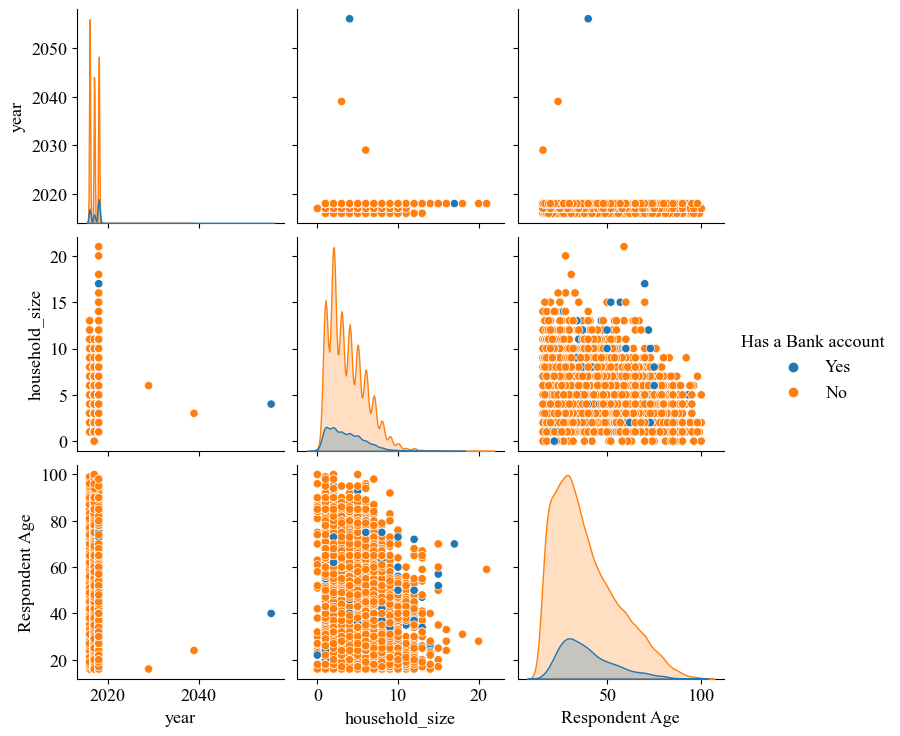

In [21]:
#creating teh pairplot for our numerical variables

sb.pairplot(cleaned_data, hue ='Has a Bank account' )

Bivariate analysis

In [22]:
# Creating a function to add labels to our barplots

def addlabels(x, y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

1. Country of respondents and age

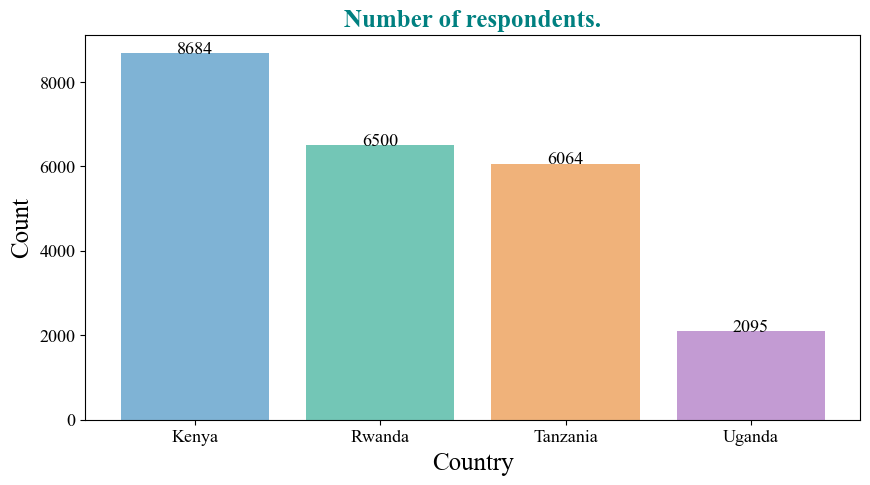

In [23]:
# visualizing the countries total respondents
x = cleaned_data['country'].unique()
y = cleaned_data['country'].value_counts() 

# making the bar chart on the data
plt.bar(x, y, color = colors)

# calling the function to add value labels
addlabels(x, y)     
plt.title('Number of respondents.', fontsize=18, fontweight = 'bold', color = 'teal')
plt.ylabel('Count', fontsize=18)
plt.xlabel('Country', fontsize=18)
plt.show()

In [24]:
# creating a crosstab for the country and individuals with bank account

df = pd.crosstab(cleaned_data['country'], cleaned_data['Has a Bank account'])
df['percent'] = (df.Yes/(df.Yes + df.No)) * 100
df

Has a Bank account,No,Yes,percent
country,,,
Kenya,4544,1520,25.065963
Rwanda,7687,997,11.480884
Tanzania,5901,599,9.215385
Uganda,1914,181,8.639618


In [25]:
#visualizing the percentages 
adf = pd.crosstab(cleaned_data['country'], cleaned_data['Has a Bank account'], margins = True,normalize = True, margins_name = 'Total').style.format('{:.2%}').background_gradient().set_caption('Heatmap of respondents with bank accounts')
adf

Has a Bank account,No,Yes,Total
country,,,
Kenya,19.47%,6.51%,25.98%
Rwanda,32.93%,4.27%,37.20%
Tanzania,25.28%,2.57%,27.85%
Uganda,8.20%,0.78%,8.97%
Total,85.88%,14.12%,100.00%


2. Gender of respondents

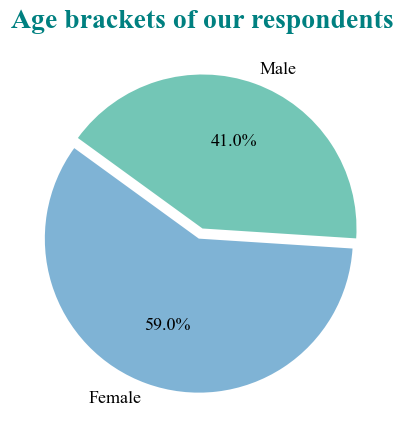

In [26]:
# creating pie chart
cleaned_data['gender_of_respondent'].value_counts().nlargest(10).plot(kind = "pie", startangle = 144 , colors = colors,explode = (0.07,0),autopct = '%1.1f%%')
plt.title('Age brackets of our respondents', fontsize = 20, fontweight = 'bold', color = 'teal')
plt.axis('off')
plt.xlabel(None)
plt.ylabel(None)
plt.show()

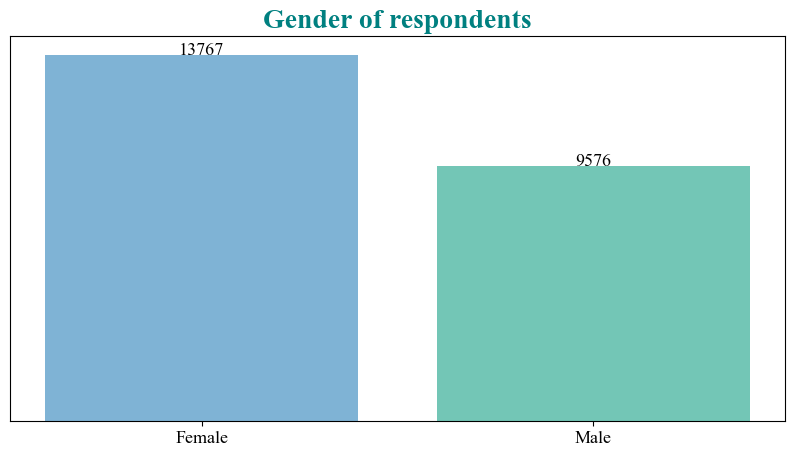

In [27]:
# creating a bar plot
gender = cleaned_data['gender_of_respondent'].unique()
res = cleaned_data['gender_of_respondent'].value_counts()
plt.bar(gender, res, color = colors)
ax = plt.gca()
ax.get_yaxis().set_visible(False)
addlabels(gender, res)
plt.title('Gender of respondents', fontsize = 20, fontweight = 'bold', color = 'teal')
plt.xlabel(None)
plt.ylabel(None)
plt.show()

3. Education level

In [28]:
# education level and individuals havig bank accounts

df1 = pd.crosstab(cleaned_data['Level of Educuation'], cleaned_data['Has a Bank account'])
df1['percent'] = (df1.Yes/(df1.Yes + df1.No)) * 100
df1.head()

Has a Bank account,No,Yes,percent
Level of Educuation,,,
6,22,5,18.518519
No formal education,4291,176,3.940004
Other/Dont know/RTA,2,6,75.000000
Primary education,11606,1083,8.534952
Secondary education,3226,981,23.318279


In [29]:
# checcking on the percentage
adf = pd.crosstab(cleaned_data['Level of Educuation'], cleaned_data['Has a Bank account'], margins = True,normalize = True, margins_name = 'Total').style.format('{:.2%}').background_gradient().set_caption('Heatmap of respondents with bank accounts')
adf

Has a Bank account,No,Yes,Total
Level of Educuation,,,
6,0.09%,0.02%,0.12%
No formal education,18.38%,0.75%,19.14%
Other/Dont know/RTA,0.01%,0.03%,0.03%
Primary education,49.72%,4.64%,54.36%
Secondary education,13.82%,4.20%,18.02%
Tertiary education,2.37%,2.53%,4.90%
Vocational/Specialised training,1.48%,1.95%,3.43%
Total,85.88%,14.12%,100.00%


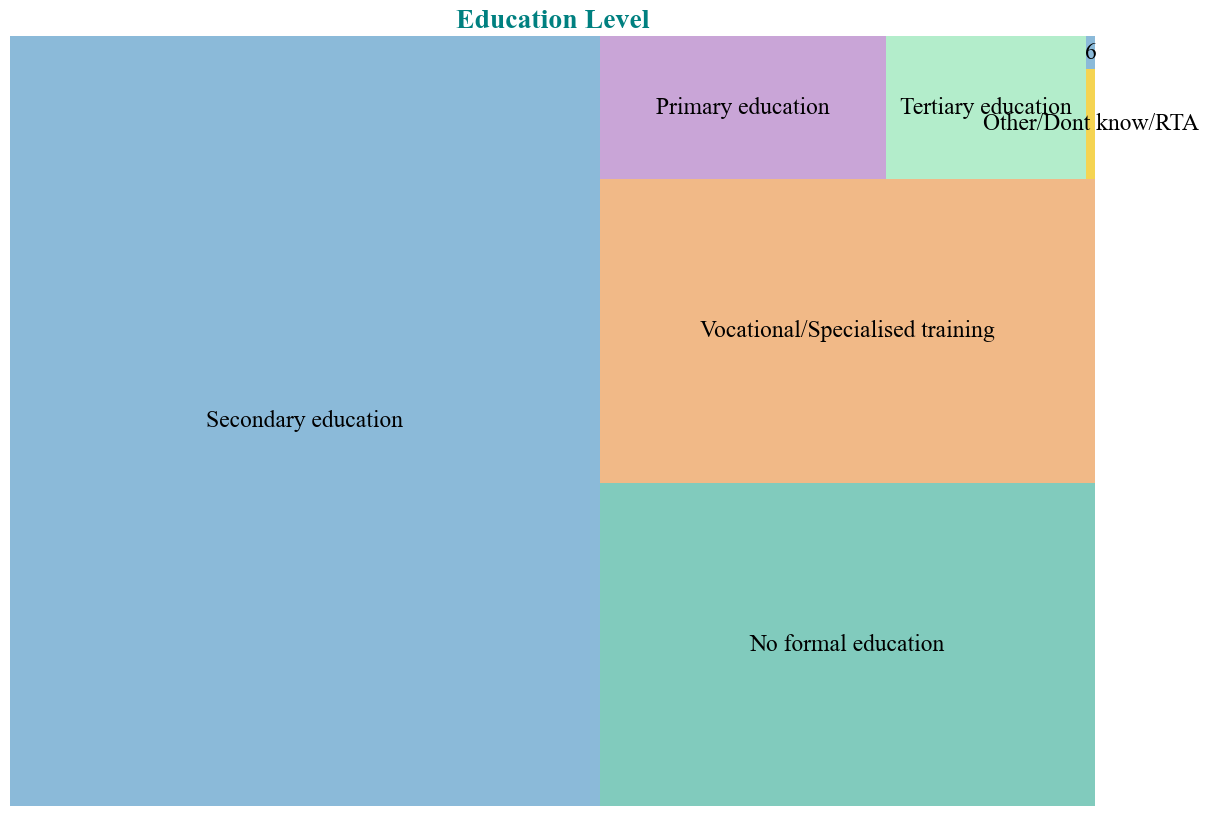

In [32]:
#creating a tree map 
import squarify
count = cleaned_data['Level of Educuation'].value_counts()
ed = cleaned_data['Level of Educuation'].unique()
plt.rc('font', size = 17)
plt.figure(figsize = (14, 10))
squarify.plot(sizes = count, label = ed, color = colors, alpha = 0.9)
plt.axis('off')
plt.title('Education Level', fontsize = 20, fontweight = 'bold', color = 'teal')
plt.show()

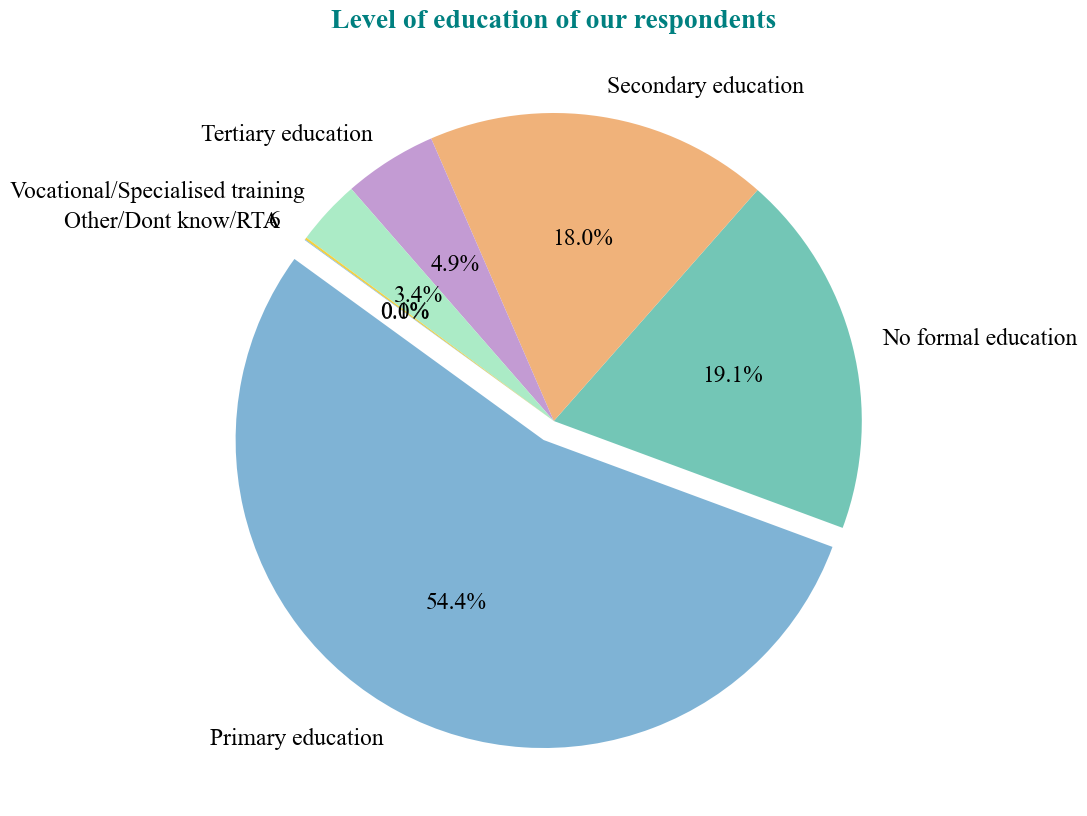

In [33]:
# creating a pie chart
plt.figure(figsize = (14, 10))
cleaned_data['Level of Educuation'].value_counts().nlargest(10).plot(kind = "pie", startangle = 144 , colors = colors,explode = (0.07,0,0,0,0,0,0),autopct = '%1.1f%%')
plt.title('Level of education of our respondents', fontsize = 20, fontweight = 'bold', color = 'teal')
plt.axis('off')
plt.xlabel(None)
plt.ylabel(None)
plt.show()

4. Type of job of respondent

In [34]:
# creating a cross table to summarize the information
df6 = pd.crosstab(cleaned_data['Type of Job'], cleaned_data['Has a Bank account'])
df6['percent'] = (df6.Yes/(df6.Yes + df6.No)) * 100
df6.head()

Has a Bank account,No,Yes,percent
Type of Job,,,
Dont Know/Refuse to answer,111,14,11.200000
Farming and Fishing,4788,634,11.693102
Formally employed Government,87,299,77.461140
Formally employed Private,481,567,54.103053
Government Dependent,197,50,20.242915


In [35]:
# breaking teh above information down into percentages
adf = pd.crosstab(cleaned_data['Type of Job'], cleaned_data['Has a Bank account'], margins = True,normalize = True, margins_name = 'Total').style.format('{:.2%}').background_gradient().set_caption('Heatmap of respondents with bank accounts')
adf

Has a Bank account,No,Yes,Total
Type of Job,,,
Dont Know/Refuse to answer,0.48%,0.06%,0.54%
Farming and Fishing,20.51%,2.72%,23.23%
Formally employed Government,0.37%,1.28%,1.65%
Formally employed Private,2.06%,2.43%,4.49%
Government Dependent,0.84%,0.21%,1.06%
Informally employed,21.89%,1.88%,23.78%
No Income,2.59%,0.06%,2.65%
Other Income,3.77%,0.84%,4.61%
Remittance Dependent,9.72%,1.03%,10.75%


In [36]:
# checking on the correlation of the numerical variables
numeric.corr()

,household_size,Respondent Age
household_size,1.000000,-0.119709
Respondent Age,-0.119709,1.000000


y=-0.866906x+(42.003217)


Text(0.5, 1.0, 'Respondent age and household size')

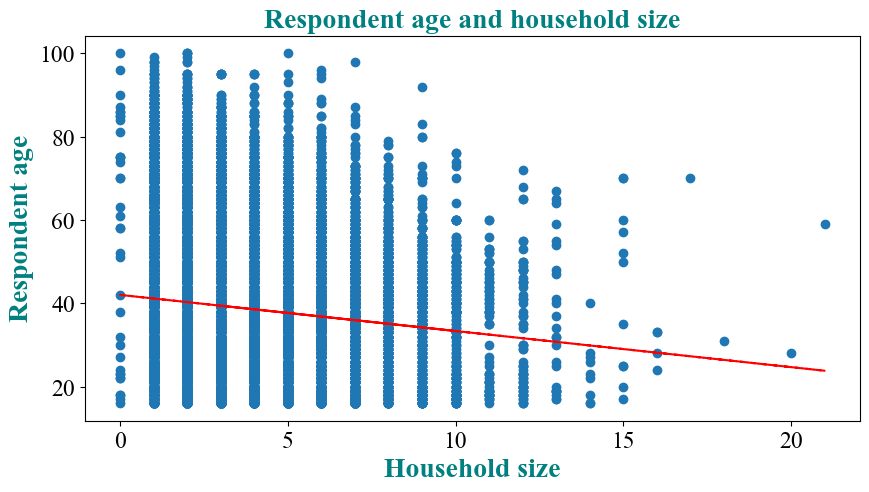

In [38]:
# creating a scatter plot with a trend line
x = numeric['household_size']
y = numeric['Respondent Age']
pylab.plot(x,y,'o')
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
pylab.plot(x,p(x),"r--")

# the line equation:
print ("y=%.6fx+(%.6f)"%(z[0],z[1]))
plt.xlabel('Household size', fontsize = 20, fontweight = 'bold', color = 'teal')
plt.ylabel('Respondent age', fontsize = 20, fontweight = 'bold', color = 'teal')
plt.title('Respondent age and household size', fontsize = 20, fontweight = 'bold', color = 'teal')